## Greedy BFS

### Examples of different dimensions of maze.

In [1]:

maze1 = [
    ['A', 0, 0, 0, 'B'],
    [1,   1, 1, 1,  0],
    [0,   0, 0, 0,  0],
    [0,   1, 1, 1,  0],
    [0,   0, 0, 0,  0],
]

maze2 = [
    ['A', 0,   1,  0, 0, 0],
    [1,   0,   1,  0, 1, 0],
    [0,   0,   0,  0, 1, 0],
    [0,   1,   1,  1, 1, 0],
    [0,   0,   0,  0, 0, 0],
    [0,   1,   1,  1, 1,'B'],
]

maze3 = [
    ['A', 0,  1,  0, 0, 0, 0, 0],
    [0,   0,  1,  0, 1, 1, 1, 0],
    [0,   1,  1,  0, 0, 0, 1, 0],
    [0,   0,  0,  0, 1, 0, 1, 0],
    [1,   1,  1,  0, 1, 0, 0, 0],
    [0,   0,  0,  0, 0, 1, 1, 0],
    [0,   1,  1,  1, 0, 0, 0, 0],
    [0,   0,  0,  0, 0, 1, 1,'B'],
]

maze4 = [
    ['A', 0,  1,  0,  0,  0, 1, 0, 0, 0],
    [0,   0,  1,  0,  1,  0, 1, 0, 1, 0],
    [1,   0,  0,  0,  1,  0, 0, 0, 1, 0],
    [0,   1,  1,  0,  0,  1, 1, 0, 0, 0],
    [0,   0,  0,  0,  1,  0, 1, 1, 1, 0],
    [1,   1,  1,  0,  1,  0, 0, 0, 1, 0],
    [0,   0,  1,  0,  0,  0, 1, 0, 0, 0],
    [0,   1,  0,  1,  1,  0, 1, 1, 1, 0],
    [0,   0,  0,  0,  0,  0, 0, 0, 1, 0],
    [1,   1,  1,  1,  1,  1, 0, 1, 0,'B'],
]

maze5 = [
    ['A', 0,  1,  0,  0,  0, 1, 0, 0, 1, 0, 0],
    [0,   0,  1,  0,  1,  0, 1, 0, 1, 0, 0, 0],
    [1,   0,  0,  0,  1,  0, 0, 0, 1, 1, 1, 0],
    [0,   1,  1,  0,  0,  1, 1, 0, 0, 0, 1, 0],
    [0,   0,  0,  0,  1,  0, 1, 1, 1, 0, 0, 0],
    [1,   1,  1,  0,  1,  0, 0, 0, 1, 1, 1, 0],
    [0,   0,  1,  0,  0,  0, 1, 0, 0, 0, 1, 0],
    [0,   1,  0,  1,  1,  0, 1, 1, 1, 0, 1, 0],
    [0,   0,  0,  0,  0,  0, 0, 0, 1, 0, 0, 0],
    [1,   1,  1,  1,  1,  1, 0, 1, 0, 1, 1, 0],
    [0,   0,  0,  0,  0,  0, 0, 1, 0, 0, 0, 0],
    [0,   1,  1,  1,  1,  1, 1, 1, 1, 1, 1,'B'],
]

### Code Initialization

In [2]:
import heapq   # for priority queue

def manhattan(a, b):
    """Heuristic: Manhattan distance (works for 4-direction grid)."""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

### Maze class definition and working

In [ ]:

class Maze:
    def __init__(self, grid, diagonal=False):
        """
        grid : 2D list containing:
            'A' = start
            'B' = goal
            0   = free cell
            1   = wall
        diagonal : whether diagonal moves are allowed
        """
        self.grid = grid
        self.diagonal = diagonal
        self.start, self.goal = self.find_start_goal()
        
        if self.start is None or self.goal is None:
            raise ValueError("Maze must have 'A' (start) and 'B' (goal).")

    def find_start_goal(self):
        """Scan the grid and find A (start) and B (goal)."""
        start = None
        goal = None
        for i in range(len(self.grid)):
            for j in range(len(self.grid[0])):
                if self.grid[i][j] == 'A':
                    start = (i, j)
                elif self.grid[i][j] == 'B':
                    goal = (i, j)
        return start, goal

    def in_bounds(self, pos):
        """Check if a cell is inside the maze."""
        x, y = pos
        return 0 <= x < len(self.grid) and 0 <= y < len(self.grid[0])

    def passable(self, pos):
        """Check if a cell is not a wall."""
        x, y = pos
        return self.grid[x][y] != 1

    def neighbors(self, pos):
        """Return list of valid neighbor cells."""
        x, y = pos
        if self.diagonal:
            directions = [(-1,0),(1,0),(0,-1),(0,1),(-1,-1),(-1,1),(1,-1),(1,1)]
        else:
            directions = [(-1,0),(1,0),(0,-1),(0,1)]

        result = []
        for dx, dy in directions:
            new_pos = (x+dx, y+dy)
            if self.in_bounds(new_pos) and self.passable(new_pos):
                result.append(new_pos)
        return result

### Greedy BFS code class

In [ ]:
class GreedyBestFirstSolver:
    def __init__(self, maze, heuristic=manhattan):
        self.maze = maze
        self.heuristic = heuristic

    def solve(self):
        start = self.maze.start
        goal = self.maze.goal

        # Priority Queue: stores (priority, cell)
        pq = []
        heapq.heappush(pq, (self.heuristic(start, goal), start))

        came_from = {start: None}
        visited = set()

        while pq:
            # Take the cell that looks closest to goal
            _, current = heapq.heappop(pq)

            if current in visited:
                continue
            visited.add(current)

            # Goal reached
            if current == goal:
                return self.reconstruct_path(came_from, goal)

            # Explore neighbors
            for nb in self.maze.neighbors(current):
                if nb not in visited:
                    if nb not in came_from:
                        came_from[nb] = current
                    heapq.heappush(pq, (self.heuristic(nb, goal), nb))

        # No path found
        return []

    def reconstruct_path(self, came_from, goal):
        """Rebuild the path from goal back to start."""
        path = []
        current = goal
        while current is not None:
            path.append(current)
            current = came_from.get(current)
        path.reverse()
        return path

    def render_with_path(self, path):
        """Return maze as text grid with path marked by *."""
        path_set = set(path)
        out = []
        for i in range(len(self.maze.grid)):
            row = []
            for j in range(len(self.maze.grid[0])):
                cell = self.maze.grid[i][j]
                if (i, j) == self.maze.start:
                    row.append('A')
                elif (i, j) == self.maze.goal:
                    row.append('B')
                elif (i, j) in path_set:
                    row.append('*')
                elif cell == 1:
                    row.append('█')
                else:
                    row.append('.')
            out.append(row)
        return out

def pretty_print(grid):
    for row in grid:
        print(" ".join(str(x) for x in row))
    print()

### Code to Printing the result

In [5]:
def pretty_print(grid):
    for row in grid:
        print(" ".join(str(x) for x in row))
    print()

### Code to draw the graph

In [ ]:
import matplotlib.pyplot as plt

def visualize_path_graph(maze, path, start, goal):
    rows, cols = len(maze), len(maze[0])

    # Convert maze into grid (1 = wall, 0 = open)
    grid = [[1 if cell == 1 else 0 for cell in row] for row in maze]

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(grid, cmap="binary")  # show walls and open cells

    # Extract path coordinates
    path_x = [c for r, c in path]
    path_y = [r for r, c in path]

    # Plot path
    ax.plot(path_x, path_y, color="blue", linewidth=2, label="Path")
    ax.scatter(*start[::-1], color="green", s=100, marker="o", label="Start")
    ax.scatter(*goal[::-1], color="red", s=100, marker="x", label="Goal")

    ax.set_title("Maze Path Visualization")
    ax.legend()
    plt.gca().invert_yaxis()  # to match maze orientation
    plt.show()


## Visualise the result and path

Path length: 25
Path: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (6, 4), (6, 5), (5, 5), (5, 6), (5, 7), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (8, 10), (8, 11), (9, 11), (10, 11), (11, 11)]
A * █ . . . █ . . █ . .
. * █ . █ . █ . █ . . .
█ * * * █ . . . █ █ █ .
. █ █ * . █ █ . . . █ .
. . . * █ . █ █ █ . . .
█ █ █ * █ * * * █ █ █ .
. . █ * * * █ * * * █ .
. █ . █ █ . █ █ █ * █ .
. . . . . . . . █ * * *
█ █ █ █ █ █ . █ . █ █ *
. . . . . . . █ . . . *
. █ █ █ █ █ █ █ █ █ █ B


Graphical Visualization:


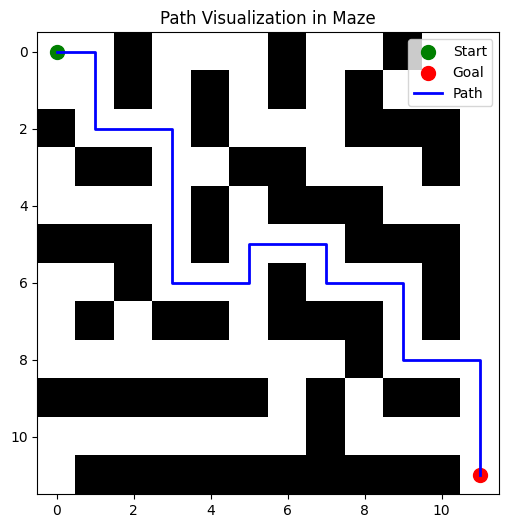

In [19]:
m = Maze(maze5, diagonal=False)
solver = GreedyBestFirstSolver(m, heuristic=manhattan)
path = solver.solve()
print('Path length:', len(path))
print('Path:', path)
pretty_print(solver.render_with_path(path))

print("\nGraphical Visualization:")
n = Maze(maze5)
visualize_path_graph(maze5, path, n.start, n.goal)

In [23]:
m = Maze(maze4, diagonal=False)
solver = GreedyBestFirstSolver(m, heuristic=manhattan)
path = solver.solve()
print('Path length:', len(path))
print('Path:', path)
pretty_print(solver.render_with_path(path))

Path length: 21
Path: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (6, 4), (6, 5), (5, 5), (5, 6), (5, 7), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (9, 9)]
A * █ . . . █ . . .
. * █ . █ . █ . █ .
█ * * * █ . . . █ .
. █ █ * . █ █ . . .
. . . * █ . █ █ █ .
█ █ █ * █ * * * █ .
. . █ * * * █ * * *
. █ . █ █ . █ █ █ *
. . . . . . . . █ *
█ █ █ █ █ █ . █ . B



In [22]:
m = Maze(maze3, diagonal=False)
solver = GreedyBestFirstSolver(m, heuristic=manhattan)
path = solver.solve()
print('Path length:', len(path))
print('Path:', path)
pretty_print(solver.render_with_path(path))


Path length: 15
Path: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3), (4, 3), (5, 3), (5, 4), (6, 4), (6, 5), (6, 6), (6, 7), (7, 7)]
A . █ . . . . .
* . █ . █ █ █ .
* █ █ . . . █ .
* * * * █ . █ .
█ █ █ * █ . . .
. . . * * █ █ .
. █ █ █ * * * *
. . . . . █ █ B

